In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

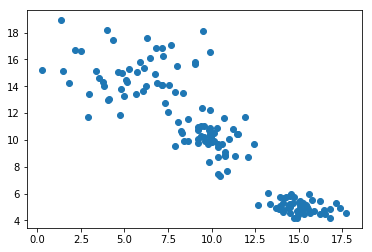

In [4]:
# Generate random data here. Your final result will not look exactly like mine, 
# But should be very close. 

x1 = np.random.normal(loc=5, scale = 2, size = 50)
x2 = np.random.normal(loc=10, scale = 1, size = 50)
x3 = np.random.normal(loc=15, scale = 1, size = 50)

y1 = np.random.normal(loc=15, scale = 2, size = 50)
y2 = np.random.normal(loc=10, scale = 1, size = 50)
y3 = np.random.normal(loc=5, scale = 0.5, size = 50)


x = np.concatenate((x1, x2, x3))
y = np.concatenate((y1, y2, y3))

df = pd.DataFrame({'x':x, 'y':y})

plt.scatter(df['x'], df['y'])

In [5]:
# Your code to implement k-means here
# Implement k-means for 3 clusters. Randomly assign initial clusters between 0,20 for x and y
# Your algorithm should output the class for each data point and the final cluster centers
# Try to recreate the plot below. As a hint, use your expected class to color the clusters
# If the colors don't match, that is fine. Just have each cluster highlighted a different
# color and the cluster centers highlighted in a different color


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6


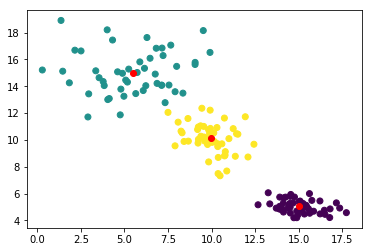

In [16]:
# Initialization
cluster_1 = np.random.uniform(0,20,2)
cluster_2 = np.random.uniform(0,20,2)
cluster_3 = np.random.uniform(0,20,2)

df["current_label"] = 0
df["dist_clust_1"] = 0
df["dist_clust_2"] = 0
df["dist_clust_3"] = 0

old_cluster_1 = np.array([0,0])
old_cluster_2 = np.array([0,0])
old_cluster_3 = np.array([0,0])

converged = False
iteration = 0

while not converged:
    print(f'iteration {iteration + 1}')
    iteration += 1
    
    # Assign Step
    df["dist_clust_1"] = np.sqrt((df['x'] - cluster_1[0])**2 + (df['y'] - cluster_1[1])**2)
    df["dist_clust_2"] = np.sqrt((df['x'] - cluster_2[0])**2 + (df['y'] - cluster_2[1])**2)
    df["dist_clust_3"] = np.sqrt((df['x'] - cluster_3[0])**2 + (df['y'] - cluster_3[1])**2)
    df["current_label"] = np.argmin(df.iloc[:,-3:].values, axis=1) + 1
    
    old_cluster_1 = cluster_1
    old_cluster_2 = cluster_2
    old_cluster_3 = cluster_3

    # Update Step
    clus_1_df = df[df["current_label"] == 1]
    clus_2_df = df[df["current_label"] == 2]
    clus_3_df = df[df["current_label"] == 3]

    cluster_1 = np.array([clus_1_df['x'].mean(), clus_1_df['y'].mean()])
    cluster_2 = np.array([clus_2_df['x'].mean(), clus_2_df['y'].mean()])
    cluster_3 = np.array([clus_3_df['x'].mean(), clus_3_df['y'].mean()])
    
    difference_1 = abs((cluster_1[0] - old_cluster_1[0])**2 + (cluster_1[1] - old_cluster_1[1])**2)
    difference_2 = abs((cluster_2[0] - old_cluster_2[0])**2 + (cluster_2[1] - old_cluster_2[1])**2)
    difference_3 = abs((cluster_3[0] - old_cluster_3[0])**2 + (cluster_3[1] - old_cluster_3[1])**2)
    
    difference_array = np.array([difference_1, difference_2, difference_3])
    if ((difference_array > 0).sum() == 0).astype(np.int):
        converged = True

plt.scatter(df['x'], df['y'], c=df['current_label'])
plt.scatter(cluster_1[0], cluster_1[1], c='red')
plt.scatter(cluster_2[0], cluster_2[1], c='red')
plt.scatter(cluster_3[0], cluster_3[1], c='red')

plt.show()

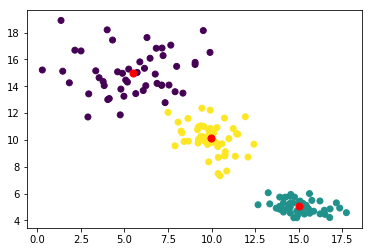

In [17]:
# Check that your algorithm works correctly
# Your output should be very very very close to the following.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df)

pred_y = kmeans.fit_predict(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red')
plt.show()